In [130]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [131]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [132]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [153]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(32,3, input_shape=(28,28,1)),
    my_conv_layer(32,3),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    my_dense_layer(100),
    my_dense_layer(10, activation="softmax")     
])



In [154]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [155]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 184s 3ms/sample - loss: 0.4508 - accuracy: 0.8443 - val_loss: 0.3367 - val_accuracy: 0.8882
Epoch 2/5
55000/55000 [==============================] - 161s 3ms/sample - loss: 0.3129 - accuracy: 0.8960 - val_loss: 0.3093 - val_accuracy: 0.8962
Epoch 3/5
55000/55000 [==============================] - 148s 3ms/sample - loss: 0.2774 - accuracy: 0.9085 - val_loss: 0.3172 - val_accuracy: 0.8898
Epoch 4/5
55000/55000 [==============================] - 143s 3ms/sample - loss: 0.2554 - accuracy: 0.9181 - val_loss: 0.2790 - val_accuracy: 0.9106
Epoch 5/5
55000/55000 [==============================] - 162s 3ms/sample - loss: 0.2373 - accuracy: 0.9246 - val_loss: 0.2766 - val_accuracy: 0.9146


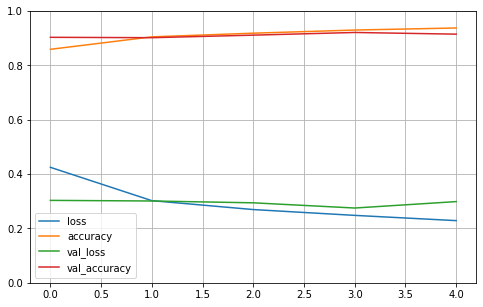

In [148]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

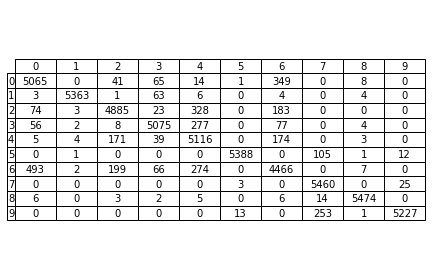

In [138]:
# create confusion matrix for the training data
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_train)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()


In [140]:
# accuracy on test data
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 6s 617us/sample - loss: 0.2775 - accuracy: 0.9141 - loss: 0.2


[0.27753175485134124, 0.9141]

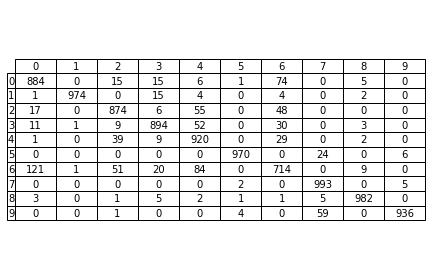

In [141]:
# create confusion matrix for the test data
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
